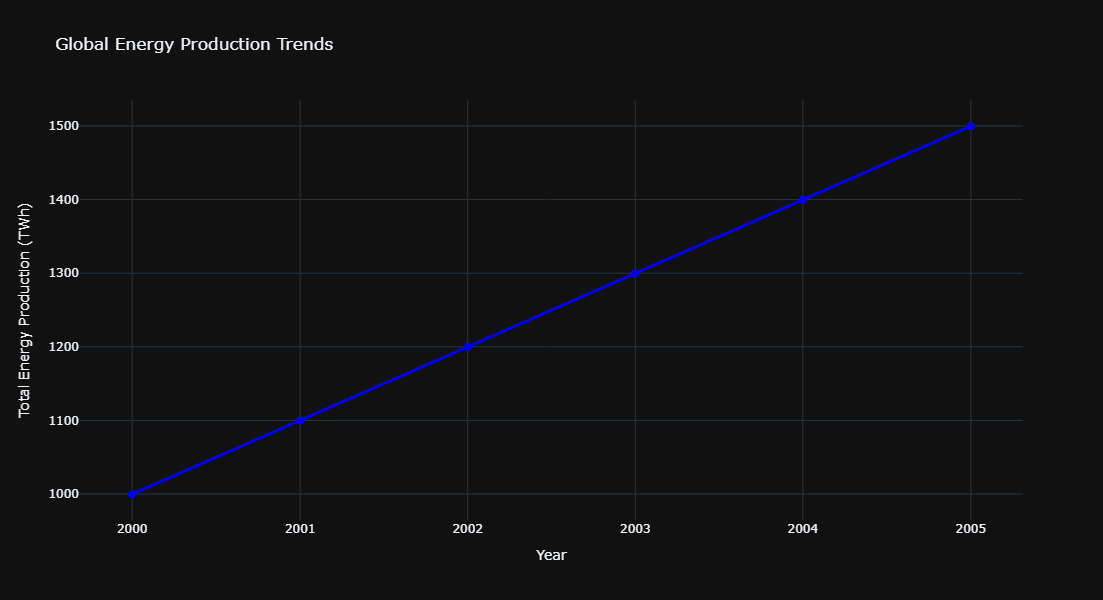

In [18]:
import plotly.graph_objects as go
import pandas as pd

# Sample DataFrame (Replace with your actual dataset)
df_pivot = pd.DataFrame({
    'year': [2000, 2001, 2002, 2003, 2004, 2005],
    'Total Energy Production': [1000, 1100, 1200, 1300, 1400, 1500]
})

# Ensure 'year' is in datetime format
df_pivot['year'] = pd.to_datetime(df_pivot['year'], format='%Y')

# Aggregate total energy production across all countries (already done)
df_global = df_pivot.groupby('year')['Total Energy Production'].sum().reset_index()

# Create an interactive plot
fig = go.Figure()

# Add a trace for the total energy production
fig.add_trace(go.Scatter(
    x=df_global['year'], 
    y=df_global['Total Energy Production'],
    mode='lines+markers',  # Add both lines and markers
    name="Total Energy Production",
    line=dict(color='blue', width=3),
    marker=dict(size=8, color='blue'),
    text=df_global['Total Energy Production'],  # Show energy production on hover
    hovertemplate="Year: %{x}<br>Total Energy Production: %{y} TWh<br><extra></extra>"
))

# Customize layout
fig.update_layout(
    title="Global Energy Production Trends",
    xaxis_title="Year",
    yaxis_title="Total Energy Production (TWh)",
    template="plotly_dark",  # Dark theme for better visuals
    height=600,
    hovermode="closest",  # Show details of the closest point when hovering
    xaxis=dict(tickformat='%Y'),  # Format x-axis ticks as years
)

# Show the plot
fig.show()


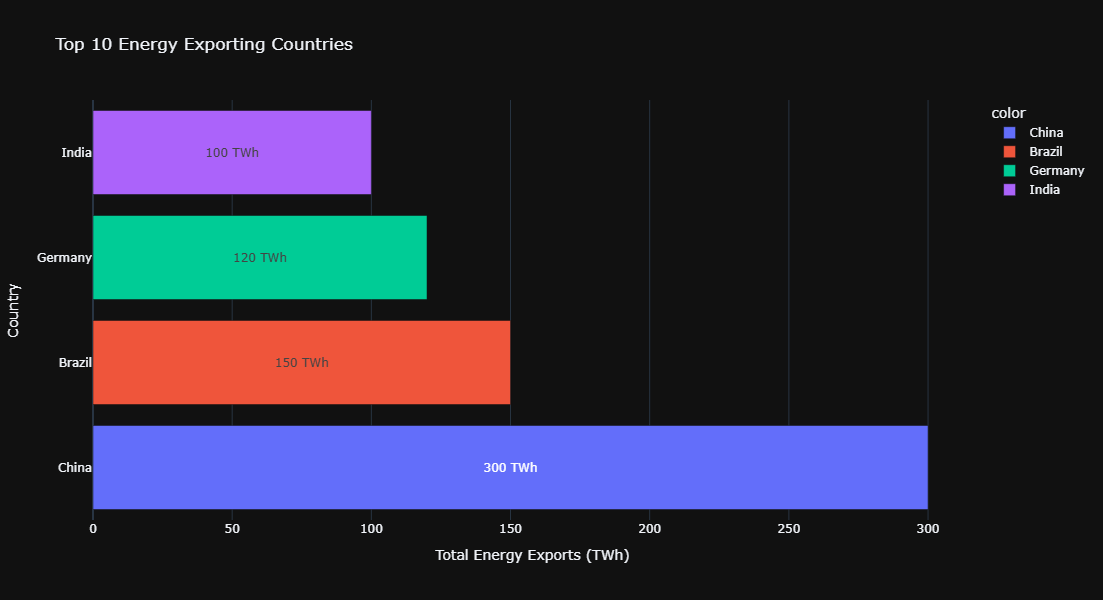

In [19]:
import plotly.express as px
import pandas as pd

# Sample DataFrame (replace with your actual dataset)
df = pd.DataFrame({
    'commodity_transaction': ['Export', 'Import', 'Export', 'Export', 'Import', 'Export'],
    'country_or_area': ['India', 'USA', 'China', 'Brazil', 'Russia', 'Germany'],
    'quantity': [100, 200, 300, 150, 250, 120]
})

# Filter dataset for only export transactions
df_exports = df[df['commodity_transaction'].str.contains("Export", case=False, na=False)]

# Group by country and sum exported energy
top_exporters = df_exports.groupby("country_or_area")["quantity"].sum().sort_values(ascending=False).head(10)

# Create the interactive bar chart
fig = px.bar(
    x=top_exporters.values, 
    y=top_exporters.index, 
    labels={"x": "Total Energy Exports (TWh)", "y": "Country"}, 
    title="Top 10 Energy Exporting Countries",
    color=top_exporters.index,
    color_continuous_scale='Blues',
    text=top_exporters.values,  # Display the export values on hover
    orientation='h'  # Horizontal bar chart
)

# Show annotations with the export values
fig.update_traces(texttemplate='%{text} TWh', textposition='inside', insidetextanchor='middle')

# Customize layout
fig.update_layout(
    xaxis_title="Total Energy Exports (TWh)",
    yaxis_title="Country",
    template="plotly_dark",  # Dark theme for better visuals
    height=600,
    hovermode="closest"  # Show details of the closest point when hovering
)

# Show the plot
fig.show()


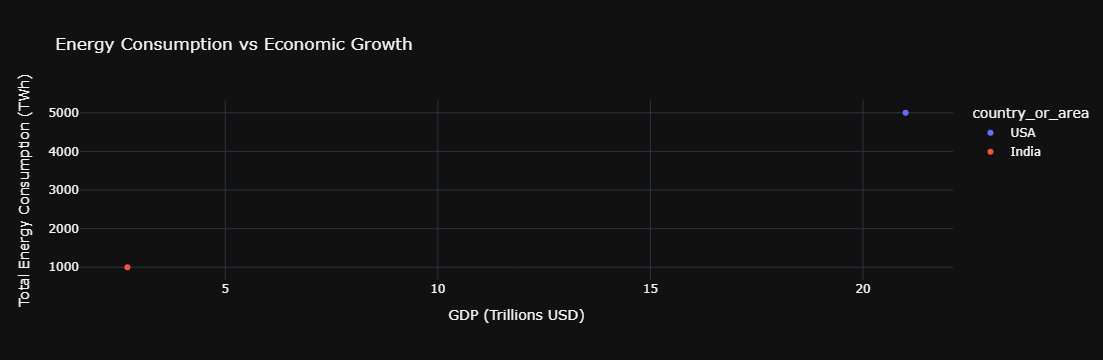

In [20]:
import plotly.express as px
import pandas as pd

# Sample DataFrame (replace with your actual dataset)
df = pd.DataFrame({
    'commodity_transaction': ['GDP', 'Energy Consumption', 'GDP', 'Energy Consumption'],
    'country_or_area': ['USA', 'USA', 'India', 'India'],
    'year': [2020, 2020, 2020, 2020],
    'quantity': [21, 5000, 2.7, 1000]
})

# Ensure no leading/trailing spaces in column names
df.columns = df.columns.str.strip().str.lower()

# Filter relevant data
gdp_data = df[df['commodity_transaction'].str.contains("GDP", case=False, na=False)]
energy_data = df[df['commodity_transaction'].str.contains("Energy Consumption", case=False, na=False)]

# Merge GDP and Energy Consumption Data
df_merged = pd.merge(
    gdp_data[['country_or_area', 'year', 'quantity']],
    energy_data[['country_or_area', 'year', 'quantity']],
    on=['country_or_area', 'year'],
    suffixes=('_gdp', '_energy')
)

# Rename columns
df_merged.rename(columns={'quantity_gdp': 'GDP', 'quantity_energy': 'Total Energy Consumption'}, inplace=True)

# Convert values to numeric (if needed)
df_merged['GDP'] = pd.to_numeric(df_merged['GDP'], errors='coerce')
df_merged['Total Energy Consumption'] = pd.to_numeric(df_merged['Total Energy Consumption'], errors='coerce')

# Create the interactive scatter plot using Plotly
fig = px.scatter(
    df_merged,
    x="GDP",
    y="Total Energy Consumption",
    color="country_or_area",
    hover_data=["country_or_area", "GDP", "Total Energy Consumption", "year"],
    title="Energy Consumption vs Economic Growth",
    labels={"GDP": "GDP (Trillions USD)", "Total Energy Consumption": "Total Energy Consumption (TWh)"},
    template="plotly_dark",
)

# Show the plot
fig.show()


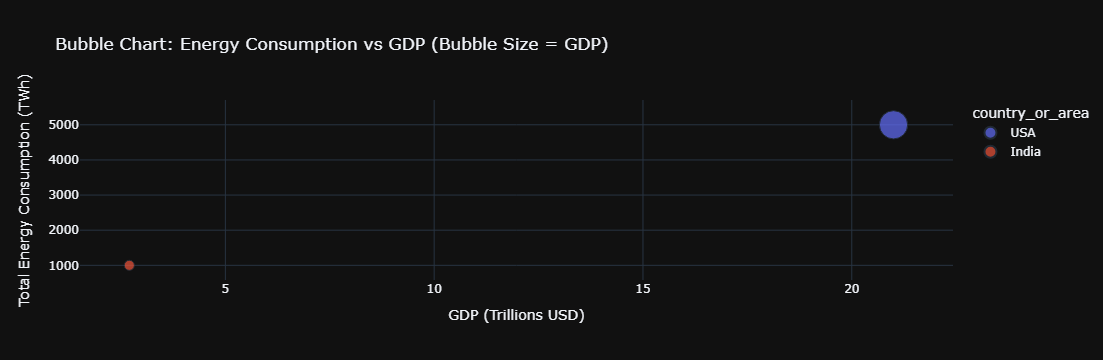

In [21]:
import plotly.express as px

# Create the Bubble chart using Plotly
fig_bubble = px.scatter(
    df_merged,
    x="GDP",
    y="Total Energy Consumption",
    color="country_or_area",
    size="GDP",  # Bubble size based on GDP
    hover_name="country_or_area",
    hover_data=["GDP", "Total Energy Consumption", "year"],
    title="Bubble Chart: Energy Consumption vs GDP (Bubble Size = GDP)",
    labels={"GDP": "GDP (Trillions USD)", "Total Energy Consumption": "Total Energy Consumption (TWh)"},
    template="plotly_dark",
)

# Show the plot
fig_bubble.show()


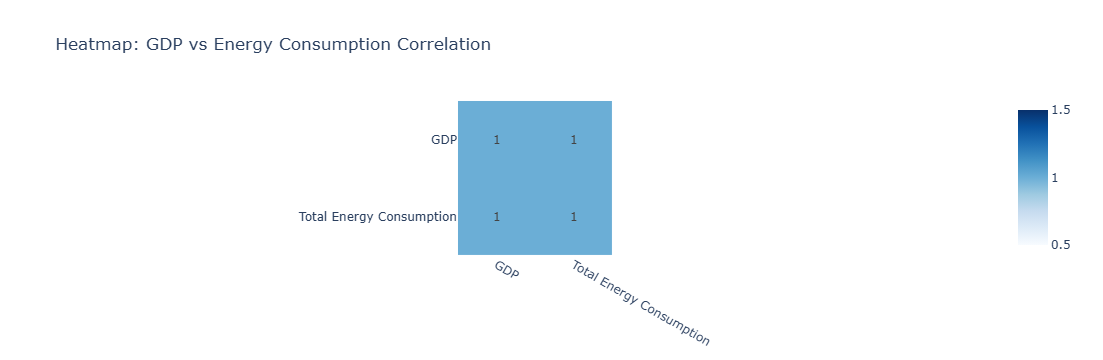

In [22]:
import plotly.express as px

# Correlation Matrix (Using GDP and Energy Consumption)
df_corr = df_merged[["GDP", "Total Energy Consumption"]].corr()

# Create Heatmap using Plotly
fig_heatmap = px.imshow(
    df_corr,
    text_auto=True,
    color_continuous_scale='Blues',
    title="Heatmap: GDP vs Energy Consumption Correlation",
)

# Show the plot
fig_heatmap.show()
